# Getting Starts JAGS

* 싸이그래머 인지모델링 스터디 : 베이지안 파트
* 김슬

#### 이번 시간의 Objects
* JAGS가 뭔지 알게 됩니다.
* JAGS가 다른 MCMC를 돌리는 놈들과 뭐가 다른지 알게 됩니다.
* JAGS를 설치합니다.
* 간단한 JAGS프로그램을 작성해봅니다.
* R과 연동해 R에서 JAGS를 돌려봅니다.
* JAGS의 실행결과를 R에서 읽어봅니다.


#### 이번 시간의 Requirements
* 베이지안 통계와 MCMC 가 뭔지 압니다. (<del>지난 시간으로 채워졌다 들었습니다ㅋ</del>)
* <del>아직 저주 내리지 않은</del> 컴퓨터

## What is JAGS?
```
프로그램으로 MCMC를 돌리려다 보면 많은 반복되는 작업이 필요
-> 중복을 줄이고 핵심만 짜자!
   BUGS탄생
   S언어와 비슷한 문법 (그래서 S따라 만든 R과도 비슷)

   그런데 BUGS는 윈도우에서만 돌잖아?
   -> JAGS탄생
      Linux, Mac, Window 가리지 않고 잘 돔
```

## BUGS vs JAGS vs STAN vs 쌩코드

#### 쌩코드
* 불필요한 반복과 노가다가 많음
* 상대적으로 느린 성능
* 잘 돌지 확신할 수 없음..

#### BUGS
* WinBUGS에서 사용하는 언어
* 쌩코드 보다는 간편함
* 쌩코드 보다는 빠름
* 많은 리소스 (기존 코드, 문서)
* 윈도우에서만 돌아감

#### STAN
* 상대적으로 새로나온 떠오르는 아이
* 좀 더 편한 표현
* 상대적으로 부족한 리소스
* 언젠가는 이쪽이 더 많아지지 않을까?

#### JAGS **
* BUGS와 비슷한 문법. 기존의 BUGS의 리소스들을 활용할 수 있음.
* 무료
* 플랫폼 독립적 (윈도우, 리눅스, 맥 모두 돌릴 수 있음)

우리는 JAGS를 합니다.

##  설치

### JAGS
#### Mac (brew)
* brew install jags

#### Mac (Binary)
* http://sourceforge.net/projects/mcmc-jags/files/JAGS/3.x/Mac%20OS%20X/
* OS 버전에 맞는 물건 받아서 설치

#### Linux (Ubuntu)
* apt-get install jags

#### Windows
* <del>http://store.apple.com 맥 구입.</del>
* http://sourceforge.net/projects/mcmc-jags/files/JAGS/3.x/Windows/
* 받아다 설치.

### rjags (R에서 jags를 사용하기 위한 라이브러리)

In [ ]:
install.packages('rjags')

## 첫번째 프로그램

JAGS를 돌리기 위해선 3가지가 필요
* 모델
* 데이터
* 초기값

하지만 우리는 JAGS에서 모델만 사용(데이터와 초기값은 R에서 셋팅)

### 모델의 정의

In [ ]:
model {
    # Likelihood
    for (i in 1:N) {
        Y[i] ~ dbern(theta)
    }

    # Prior
    theta ~ dbeta(3, 3)
}

model {} 로 감싸여있음

* Likelihood 랑
* Pirior Distribution 를 정의함

####Data Loop
일반적인 Foreach 문

In [ ]:
for(i in 1:N) {
    ...
}

#### 기호 <-
R이나 S랑 똑같음

#### 기호 ~
~는 분포에서 랜덤한 값 하나를 가져와 넣겠단 의미

In [ ]:
Y[i] ~ dbern(theta)  # Y[i]에 dbern(theta)를 시행한 랜덤값 하나를 넣겠다는 의미

####주요 분포들
* Bernoulli: dbern(p)
* Binomial: dbin(p, n)
* Negative Binomial: dnegbin(p, r)
* Categorical: dcat(p)
* Poisson: dpois(lambda)

* Normal: dnorm(mu,1/sigma^2)
* Gamma: dgamma(alpha, lambda)
* Uniform: dunif(a, b)

## 첫번째 실행

<del>엄청 불편함</del>
0. 라이브러리 불러옴
1. 문자열로 모델을 정의
2. ????
3. PROFIT!!


#### 라이브러리 로딩

In [2]:
options(warn=-1)

In [3]:
library(rjags)

#### 모델을 문자열로 넣고

In [4]:
simpleModelString = "
    model {
        for (i in 1:N) {
            Y[i] ~ dbern(theta)
        }
        theta ~ dbeta(1, 1)
    }
"

#### 모델 Initialize

In [5]:
m = jags.model(
    textConnection(simpleModelString),
    data = list(
        Y = c(1, 0, 0, 1, 1),
        N = 5
    )
)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
   Graph Size: 8

Initializing model



#### ※ : 책에선 파일로 쓴 다음 읽어오는 방식 사용중. 정말 원하면 그렇게 해도 됨.

In [6]:
## 정말 원한다면 먼저 파일로 쓰고 파일에서 불러와도 됨
# writeLines(simpleModelString, con="simple.jags")
# m2 = jags.model("simple.jags", ...)

#### 시행!

In [7]:
samples = coda.samples(m, c("theta"), 1000)

#### 결과

In [8]:
samples

[[1]]
Markov Chain Monte Carlo (MCMC) output:
Start = 1 
End = 1000 
Thinning interval = 1 
             theta
   [1,] 0.68700588
   [2,] 0.51548627
   [3,] 0.75667543
   [4,] 0.67327145
   [5,] 0.51083807
   [6,] 0.72850366
   [7,] 0.43645907
   [8,] 0.57342133
   [9,] 0.68946534
  [10,] 0.48829095
  [11,] 0.57228869
  [12,] 0.77037121
  [13,] 0.67284018
  [14,] 0.55962484
  [15,] 0.54224749
  [16,] 0.68475665
  [17,] 0.43454456
  [18,] 0.43412345
  [19,] 0.49356663
  [20,] 0.56620476
  [21,] 0.78362389
  [22,] 0.45539776
  [23,] 0.90318050
  [24,] 0.58282430
  [25,] 0.35685945
  [26,] 0.65721144
  [27,] 0.45634794
  [28,] 0.51080992
  [29,] 0.56446209
  [30,] 0.30178425
  [31,] 0.61317964
  [32,] 0.71861099
  [33,] 0.54320619
  [34,] 0.54080302
  [35,] 0.59992713
  [36,] 0.36606554
  [37,] 0.41787129
  [38,] 0.69376818
  [39,] 0.64023605
  [40,] 0.47983679
  [41,] 0.71759826
  [42,] 0.66750709
  [43,] 0.61908532
  [44,] 0.43473779
  [45,] 0.48441932
  [46,] 0.62845689
  [47,] 0.69397

#### 결과를 표로 그리기

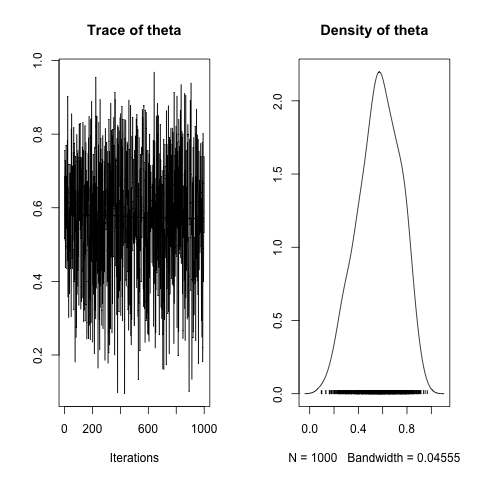

In [9]:
plot(samples)

### 쓸모는 모르겠지만 참고용 책에 있던 예제..

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
   Graph Size: 4

Initializing model



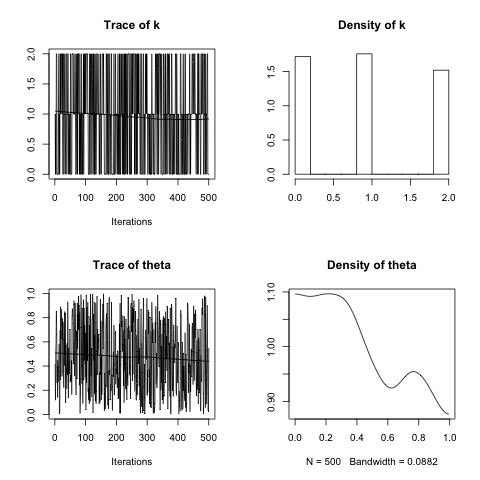

In [10]:
plot(coda.samples(jags.model(
    textConnection("
        model {
            theta ~ dbeta(1, 1)
            k ~ dbin(theta, n)
        }
    "),
    data = list(n=2)
), c("theta", "k"), 500))

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
   Graph Size: 37

Initializing model



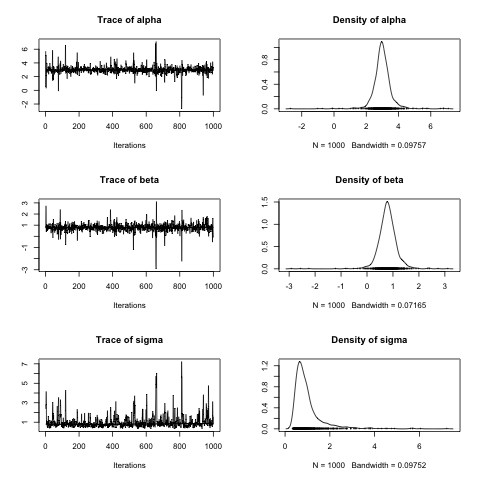

In [11]:
plot(coda.samples(jags.model(
    textConnection("
        model {
            for(i in 1:N) {
                Y[i] ~ dnorm(mu[i], tau)
                mu[i] <- alpha + beta * (x[i] - mean(x[]))
            }
            sigma <- 1/sqrt(tau)
            alpha ~ dnorm(0, 1.0E-6)
            beta ~ dnorm(0, 1.0E-6)
            tau ~ dgamma(1.0E-3, 1.0E-3)
        }
    "),
    data = list(
        x = c(1, 2, 3, 4, 5),
        Y = c(1, 3, 3, 3, 5),
        N = 5
    )
), c("alpha", "beta", "sigma"), 1000))

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
   Graph Size: 19

Initializing model



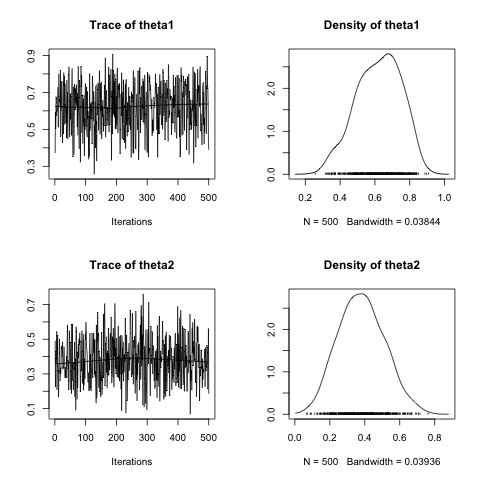

In [12]:
plot(coda.samples(jags.model(
    textConnection("
        model {
            for ( i in 1 : N1 ) { y1[i] ~ dbern(theta1) }
            for ( i in 1 : N2 ) { y2[i] ~ dbern(theta2) }
            theta1 ~ dbeta(3, 3)
            theta2 ~ dbeta(3, 3)
        }
    "),
    data = list(
        N1 = 7,
        y1 = c(1,1,1,1,1,0,0),
        N2 = 7,
        y2 = c(1,1,0,0,0,0,0)
    )
), c("theta1", "theta2"), 500))

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
   Graph Size: 1009

Initializing model



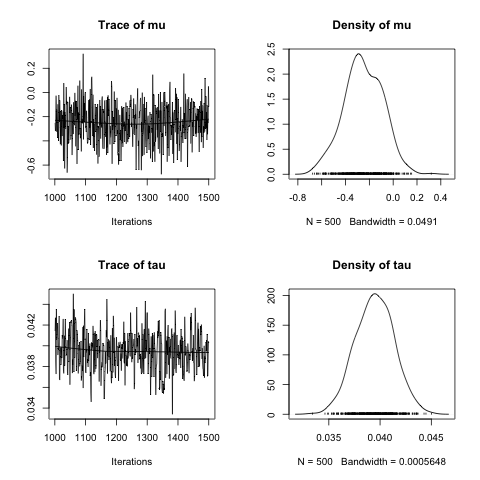

In [13]:
plot(coda.samples(jags.model(
    textConnection("
        model {
            for (i in 1:N) {
                x[i] ~ dnorm(mu, tau)
            }
            mu ~ dnorm(0, .0001)
            tau <- pow(sigma, -2)
            sigma ~ dunif(0, 100)
        }
    "),
    data = list(
        x = rnorm(1000, 0, 5),
        N = 1000
    )
), c("mu", "tau"), 500))

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
   Graph Size: 18

Initializing model



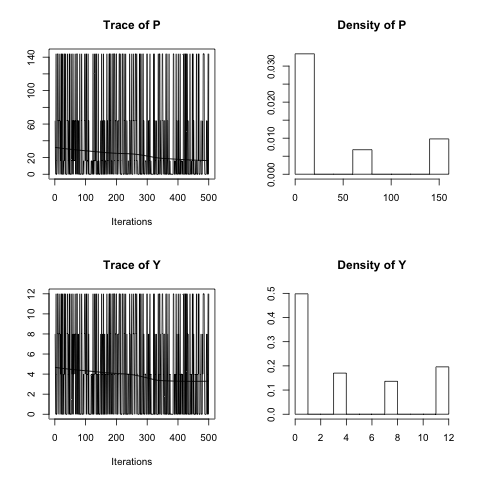

In [14]:
plot(coda.samples(jags.model(
    textConnection("
        model {

          for (i in 1:n){
            p[i] <- 1 / n
          }  

          face_rolled ~ dcat(p)

          X <- 2 * face_rolled

          Y <- ifelse(equals(face_rolled,2) || equals(face_rolled, 4) || equals(face_rolled, 6), X, 0)

          S <- X + Y
          P <- X * Y

        }
    "),
    data = list(n=6)
), c("P", "Y"), 500))